In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from IPython.display import HTML


In [7]:
train = pd.read_csv("E:/kaggle/input/train/train.csv", nrows=100000000,dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [8]:
train.rename({"acoustic_data": "signal", "time_to_failure": "quaketime"}, axis="columns", inplace=True)

In [9]:
for n in range(5):
    print(train.quaketime.values[n])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


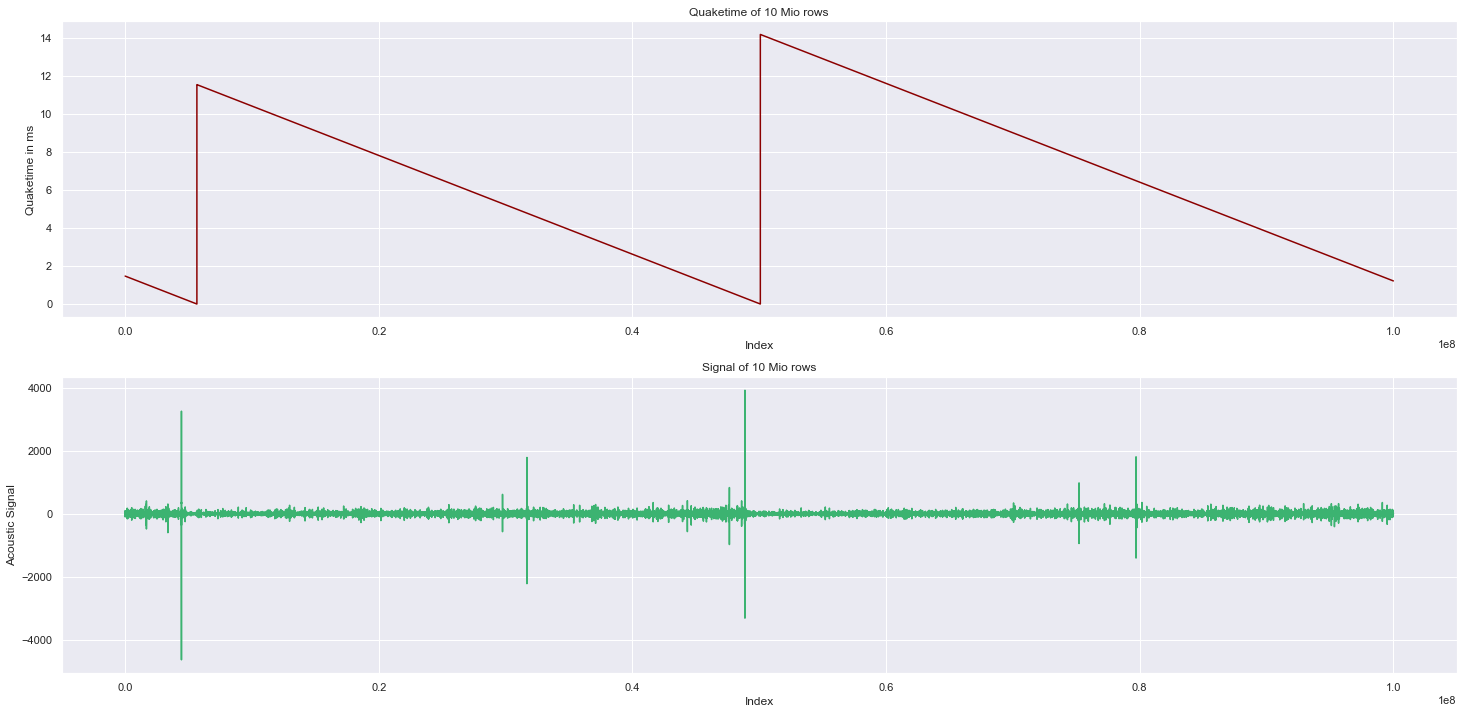

In [10]:
fig, ax = plt.subplots(2,1, figsize=(25,12))
ax[0].plot(train.index.values, train.quaketime.values, c="darkred")
ax[0].set_title("Quaketime of 10 Mio rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Quaketime in ms");
ax[1].plot(train.index.values, train.signal.values, c="mediumseagreen")
ax[1].set_title("Signal of 10 Mio rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Acoustic Signal");

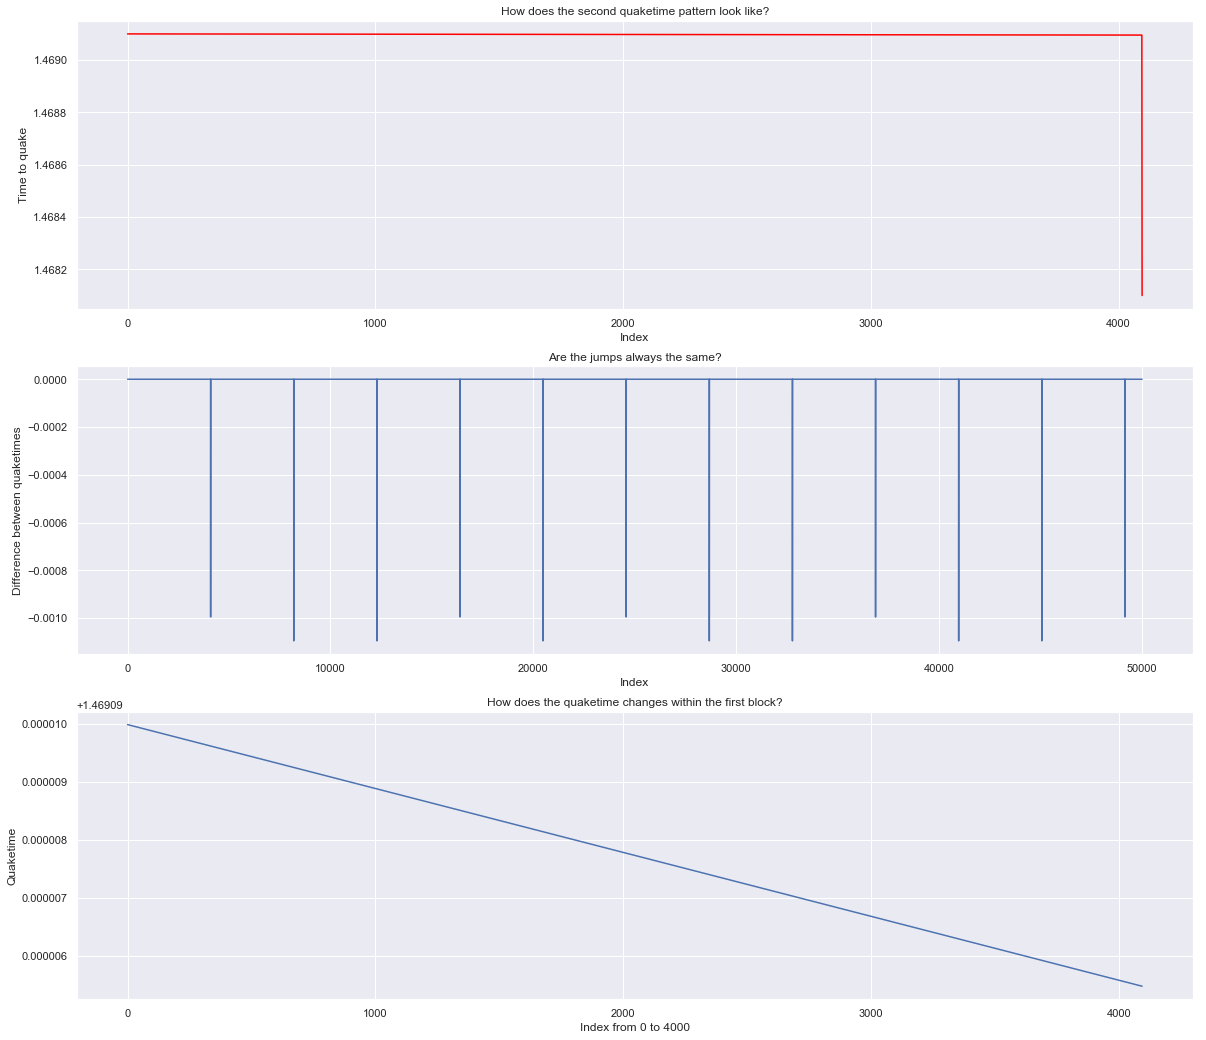

In [16]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[0:4096], train.quaketime.values[0:4096], c="Red")    #每4095个样本是一次采样
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train.index.values[0:49999], np.diff(train.quaketime.values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train.index.values[0:4095], train.quaketime.values[0:4095])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("How does the quaketime changes within the first block?");

In [18]:
from os import listdir
test_path = "E:/kaggle/input/test/"
test_files = listdir("E:/kaggle/input/test/")

In [19]:
test_files

['seg_00030f.csv',
 'seg_0012b5.csv',
 'seg_00184e.csv',
 'seg_003339.csv',
 'seg_0042cc.csv',
 'seg_004314.csv',
 'seg_004cd2.csv',
 'seg_004ee5.csv',
 'seg_004f1f.csv',
 'seg_00648a.csv',
 'seg_006e4a.csv',
 'seg_007a37.csv',
 'seg_00a37e.csv',
 'seg_00be11.csv',
 'seg_00c35b.csv',
 'seg_00cc91.csv',
 'seg_00e5f7.csv',
 'seg_00f3b9.csv',
 'seg_010eab.csv',
 'seg_0125d9.csv',
 'seg_0144cb.csv',
 'seg_0165c6.csv',
 'seg_016913.csv',
 'seg_016cdb.csv',
 'seg_017314.csv',
 'seg_01a8dc.csv',
 'seg_01c775.csv',
 'seg_01ecb0.csv',
 'seg_02042f.csv',
 'seg_025e78.csv',
 'seg_032822.csv',
 'seg_0339ca.csv',
 'seg_037461.csv',
 'seg_038879.csv',
 'seg_03d386.csv',
 'seg_03d63e.csv',
 'seg_03d680.csv',
 'seg_03f380.csv',
 'seg_0445d7.csv',
 'seg_046c28.csv',
 'seg_0488a1.csv',
 'seg_049957.csv',
 'seg_04a696.csv',
 'seg_04ae38.csv',
 'seg_04b87a.csv',
 'seg_04cceb.csv',
 'seg_04ee93.csv',
 'seg_04fd93.csv',
 'seg_0536c9.csv',
 'seg_055127.csv',
 'seg_05a1b0.csv',
 'seg_05a4ad.csv',
 'seg_05b66a

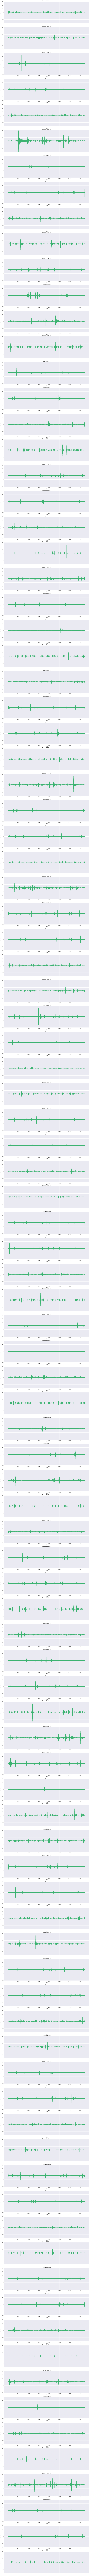

In [25]:
fig, ax = plt.subplots(100,1, figsize=(20,25*25))

for n in range(100):
    seg = pd.read_csv(test_path  + test_files[n])
    ax[n].plot(seg.acoustic_data.values, c="mediumseagreen")
    ax[n].set_xlabel("Index")
    ax[n].set_ylabel("Signal")
    ax[n].set_ylim([-300, 300])
    ax[n].set_title("Test {}".format(test_files[n]));

In [26]:
train.describe()

,signal,quaketime
count,1.000000e+08,1.000000e+08
mean,4.648496e+00,6.447961e+00
std,1.041905e+01,3.842484e+00
min,-4.621000e+03,6.954822e-04
25%,2.000000e+00,3.120298e+00
50%,5.000000e+00,6.366700e+00
75%,7.000000e+00,9.613998e+00
max,3.914000e+03,1.418060e+01


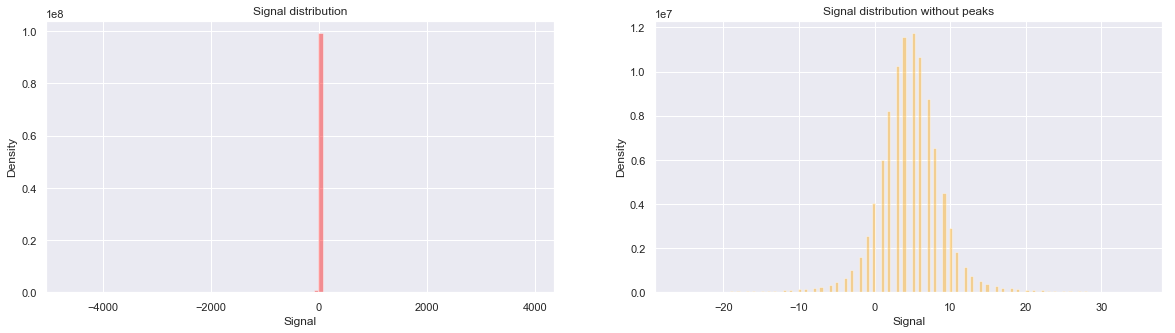

In [29]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(train.signal.values, ax=ax[0], color="Red", bins=100, kde=False)
ax[0].set_xlabel("Signal")
ax[0].set_ylabel("Density")
ax[0].set_title("Signal distribution")

low = train.signal.mean() - 3 * train.signal.std()
high = train.signal.mean() + 3 * train.signal.std() 
sns.distplot(train.loc[(train.signal >= low) & (train.signal <= high), "signal"].values,
             ax=ax[1],
             color="Orange",
             bins=150, kde=False)
ax[1].set_xlabel("Signal")
ax[1].set_ylabel("Density")
ax[1].set_title("Signal distribution without peaks");

In [30]:
stepsize = np.diff(train.quaketime)                 #步长都相同   新添加特征 
train = train.drop(train.index[len(train)-1])
train["stepsize"] = stepsize
train.head(5)

,signal,quaketime,stepsize
0,12,1.4691,-1.100000e-09
1,6,1.4691,-1.100000e-09
2,8,1.4691,-1.100000e-09
3,5,1.4691,-1.100000e-09
4,8,1.4691,-1.100000e-09


In [33]:
train.stepsize = train.stepsize.apply(lambda l: np.round(l, 10))  #round四舍五入
stepsize_counts = train.stepsize.value_counts()
stepsize_counts

-1.100000e-09    77948584
-1.000000e-09    19821614
-2.000000e-09     2205387
-1.095496e-03       12170
-9.954955e-04        6848
-1.095495e-03        3437
-9.954950e-04        1936
-1.095497e-03           9
-9.954966e-04           6
-1.095497e-03           3
 1.417990e+01           1
-1.095495e-03           1
-1.095496e-03           1
-1.095495e-03           1
 1.154000e+01           1
Name: stepsize, dtype: int64

In [34]:
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=5)    #时间序列滑动窗法

In [35]:
window_sizes = [10, 50, 100, 1000]   
for window in window_sizes:
    train["rolling_mean_" + str(window)] = train.signal.rolling(window=window).mean()
    train["rolling_std_" + str(window)] = train.signal.rolling(window=window).std()

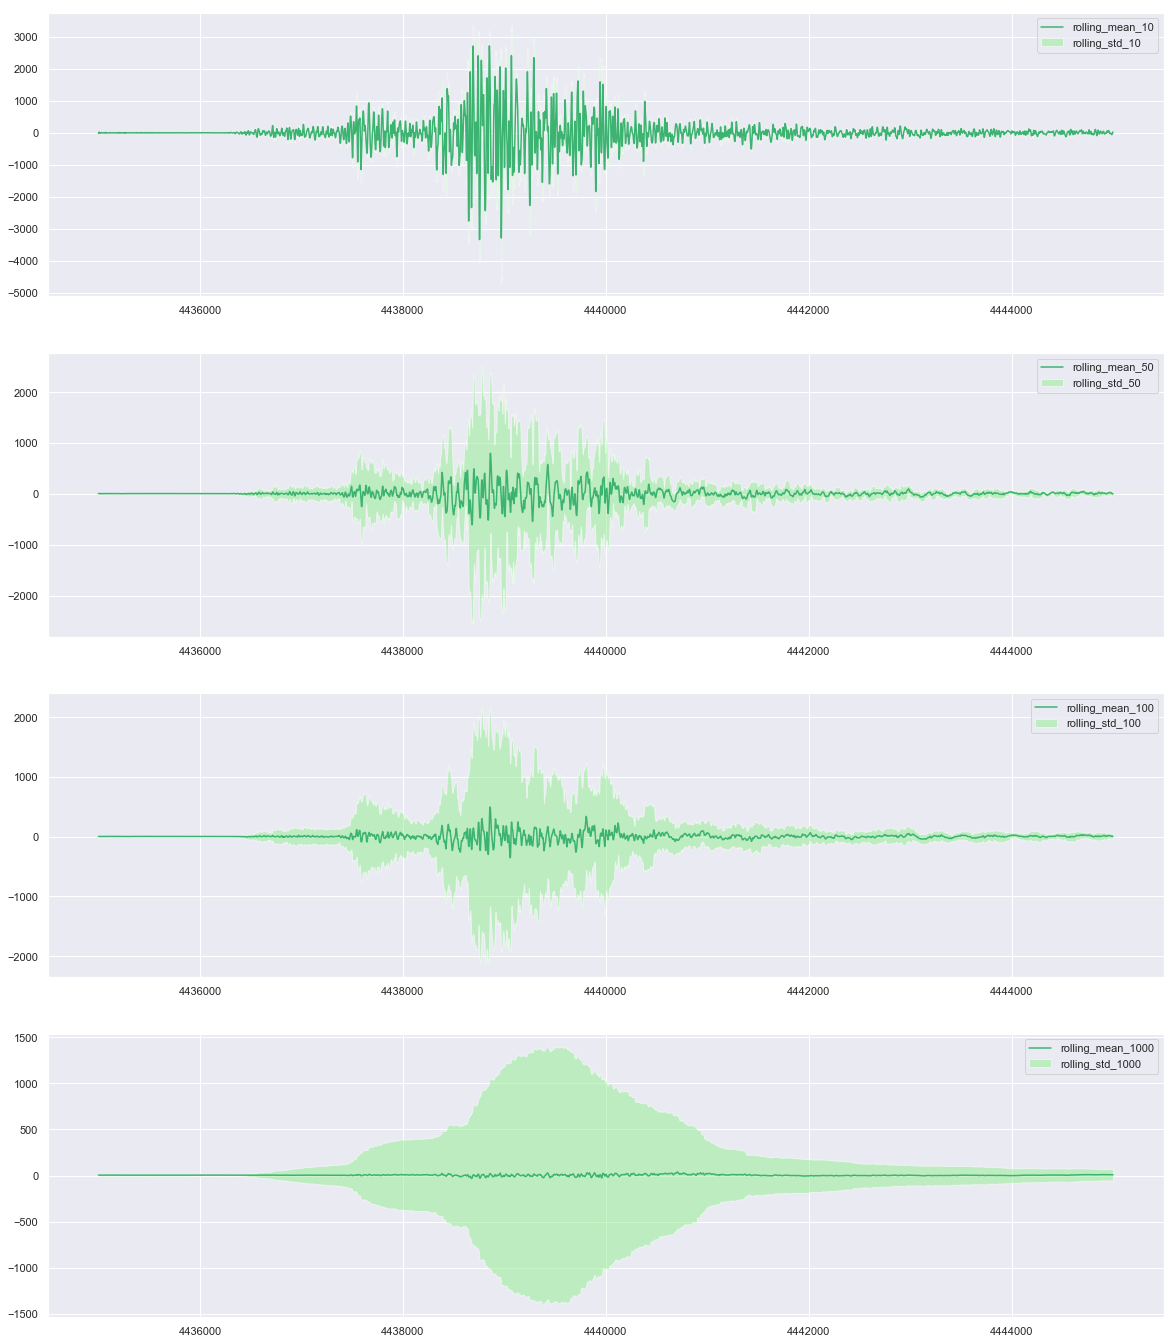

In [36]:
fig, ax = plt.subplots(len(window_sizes),1,figsize=(20,6*len(window_sizes)))

n = 0
for col in train.columns.values:
    if "rolling_" in col:
        if "mean" in col:
            mean_df = train.iloc[4435000:4445000][col]
            ax[n].plot(mean_df, label=col, color="mediumseagreen")
        if "std" in col:
            std = train.iloc[4435000:4445000][col].values
            ax[n].fill_between(mean_df.index.values,
                               mean_df.values-std, mean_df.values+std,
                               facecolor='lightgreen',
                               alpha = 0.5, label=col)
            ax[n].legend()
            n+=1

In [37]:
train["rolling_q25"] = train.signal.rolling(window=50).quantile(0.25)
train["rolling_q75"] = train.signal.rolling(window=50).quantile(0.75)
train["rolling_q50"] = train.signal.rolling(window=50).quantile(0.5)
train["rolling_iqr"] = train.rolling_q75 - train.rolling_q25
train["rolling_min"] = train.signal.rolling(window=50).min()
train["rolling_max"] = train.signal.rolling(window=50).max()
train["rolling_skew"] = train.signal.rolling(window=50).skew()    #求偏度，用来描述数据分布的对称性 正态分布的偏度为0。计算数据样本的偏度，当偏度<0时，称为负偏，数据出现左侧长尾；当偏度>0时，称为正偏，数据出现右侧长尾；当偏度为0时，表示数据相对均匀的分布在平均值两侧，不一定是绝对的对称分布，此时要与正态分布偏度为0的情况进行区分。
train["rolling_kurt"] = train.signal.rolling(window=50).kurt()    #求峰度，越大越陡峭

In [40]:
train

,signal,quaketime,stepsize,rolling_mean_10,rolling_std_10,rolling_mean_50,rolling_std_50,rolling_mean_100,rolling_std_100,rolling_mean_1000,rolling_std_1000,rolling_q25,rolling_q75,rolling_q50,rolling_iqr,rolling_min,rolling_max,rolling_skew,rolling_kurt
0,12,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-5,1.4691,-1.100000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,1.4691,-1.100000e-09,6.1,4.581363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'train' is not defined